# File and libraries

In [7]:
import pandas as pd
import numpy as np


filepath=r'data/df_merch_5_scaler_input'


file_tag = "df_merch_feat_eng_input"

# DSLabs functions

In [8]:
%run "scripts/dslabs_functions.py"


# Data functions

In [9]:
%run "scripts/data_functions.py"


data_functions lodaded


# Load

In [10]:
# test_data=True
test_data=False

# use to evaluate strategies. otherwise False to just transform data 
evaluate=True
# evaluate=False


if test_data==True:

    data=pd.read_csv(f"{filepath}.csv")
    
    test= pd.read_csv(f"{filepath}_test.csv")
    train= pd.read_csv(f"{filepath}_train.csv")

    sample=0.05
    data = data.groupby('day_of_year').apply(lambda x: sample_per_day(x, sample)).reset_index(drop=True)
    test = test.groupby('day_of_year').apply(lambda x: sample_per_day(x, sample)).reset_index(drop=True)
    train = train.groupby('day_of_year').apply(lambda x: sample_per_day(x, sample)).reset_index(drop=True)
    
    # create sample df version of test/train for variance studies
    test_sample= test
    train_sample= train
    
else:
    data=pd.read_csv(f"{filepath}.csv")

    
    test= pd.read_csv(f"{filepath}_test.csv")
    train= pd.read_csv(f"{filepath}_train.csv")

    # create sample for variance studies
    sample=0.01
    test_sample = test.groupby('day_of_year').apply(lambda x: sample_per_day(x, sample)).reset_index(drop=True)
    train_sample = train.groupby('day_of_year').apply(lambda x: sample_per_day(x, sample)).reset_index(drop=True)


 
target='returning_user'
vars: list[str] = data.columns.to_list()


# ensure sorting by day_of_year for correct splitting 
# "When in the presence of temporal data, data partition shall use older data to train and newer to test, in order to not use future data to classify past data. In any other case, partition shall be random."
data.sort_values(by='day_of_year', inplace=True)
test.sort_values(by='day_of_year', inplace=True)
train.sort_values(by='day_of_year', inplace=True)



data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364427 entries, 0 to 364426
Data columns (total 42 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   event_name                       364427 non-null  float64
 1   device_category                  364427 non-null  float64
 2   device_mobile_brand_name         364427 non-null  float64
 3   device_mobile_model_name         364427 non-null  float64
 4   device_operating_system          364427 non-null  float64
 5   device_operating_system_version  364427 non-null  float64
 6   device_language                  364427 non-null  float64
 7   device_web_info_browser          364427 non-null  float64
 8   device_web_info_browser_version  364427 non-null  float64
 9   geo_region                       364427 non-null  float64
 10  geo_city                         364427 non-null  float64
 11  traffic_source_medium            364427 non-null  float64
 12  traffic

In [11]:
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

Train shape: (255098, 42)
Test shape: (109329, 42)


# Feat 1 - Dropping Low Variance Variables

## Feat 1 - Study Low Variance Variables and Threshold

using sampled dataframe due to heavy processing

### precision

Testing threshold: 0.003
Dropping variables: ['year', 'quarter']
Remaining features after drop: 40
Evaluation results at threshold 0.003: {'accuracy': [0.684981684981685, 0.7454212454212454], 'recall': [0.3320754716981132, 0.045283018867924525], 'precision': [0.34509803921568627, 0.32432432432432434], 'auc': [0.5650703839748122, 0.5075266363988957], 'f1': [0.3384615384615385, 0.07947019867549669]}
Evaluation for precision: [0.34509803921568627, 0.32432432432432434]
Testing threshold: 0.006
Dropping variables: ['year', 'quarter']
Remaining features after drop: 40
Evaluation results at threshold 0.006: {'accuracy': [0.684981684981685, 0.7454212454212454], 'recall': [0.3320754716981132, 0.045283018867924525], 'precision': [0.34509803921568627, 0.32432432432432434], 'auc': [0.5650703839748122, 0.5075266363988957], 'f1': [0.3384615384615385, 0.07947019867549669]}
Evaluation for precision: [0.34509803921568627, 0.32432432432432434]
Testing threshold: 0.009
Dropping variables: ['year', 'quart

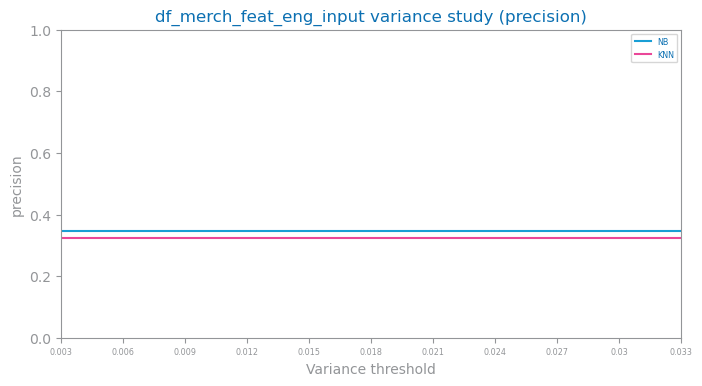

In [12]:
# modified study_variance_for_feature_selection() in dslabs functions to keep minimum variables and print metrics (due to error)
if evaluate==True:

    eval_metric = "precision"
    figure(figsize=(2 * HEIGHT, HEIGHT))
    study_variance_for_feature_selection(
        train_sample,
        test_sample,
        target=target,
        max_threshold=0.05,
        lag=0.005,
        metric=eval_metric,
        file_tag=file_tag,
        min_features_to_keep = 10  # Minimum features safeguard

    )
    show()

### recall

Testing threshold: 0.003
Dropping variables: ['year', 'quarter']
Remaining features after drop: 40
Evaluation results at threshold 0.003: {'accuracy': [0.4661172161172161, 0.597985347985348], 'recall': [0.8037735849056604, 0.32075471698113206], 'precision': [0.2862903225806452, 0.24709302325581395], 'auc': [0.5808468891880176, 0.5037872738472771], 'f1': [0.4222001982160555, 0.2791461412151067]}
Evaluation for recall: [0.8037735849056604, 0.32075471698113206]
Testing threshold: 0.006
Dropping variables: ['year', 'quarter']
Remaining features after drop: 40
Evaluation results at threshold 0.006: {'accuracy': [0.4661172161172161, 0.597985347985348], 'recall': [0.8037735849056604, 0.32075471698113206], 'precision': [0.2862903225806452, 0.24709302325581395], 'auc': [0.5808468891880176, 0.5037872738472771], 'f1': [0.4222001982160555, 0.2791461412151067]}
Evaluation for recall: [0.8037735849056604, 0.32075471698113206]
Testing threshold: 0.009
Dropping variables: ['year', 'quarter']
Remaining

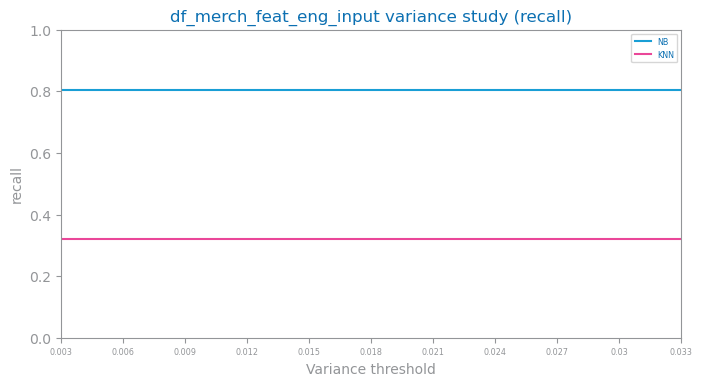

In [13]:
# modified study_variance_for_feature_selection() in dslabs functions to keep minimum variables and print metrics (due to error)
if evaluate==True:

    eval_metric = "recall"
    figure(figsize=(2 * HEIGHT, HEIGHT))
    study_variance_for_feature_selection(
        train_sample,
        test_sample,
        target=target,
        max_threshold=0.033,
        lag=0.003,
        metric=eval_metric,
        file_tag=file_tag,
        min_features_to_keep = 10  # Minimum features safeguard

    )
    show()

### accuracy study

Testing threshold: 0.003
Dropping variables: ['year', 'quarter']
Remaining features after drop: 40
Evaluation results at threshold 0.003: {'accuracy': [0.684981684981685, 0.7454212454212454], 'recall': [0.3320754716981132, 0.045283018867924525], 'precision': [0.34509803921568627, 0.32432432432432434], 'auc': [0.5650703839748122, 0.5075266363988957], 'f1': [0.3384615384615385, 0.07947019867549669]}
Evaluation for accuracy: [0.684981684981685, 0.7454212454212454]
Testing threshold: 0.006
Dropping variables: ['year', 'quarter']
Remaining features after drop: 40
Evaluation results at threshold 0.006: {'accuracy': [0.684981684981685, 0.7454212454212454], 'recall': [0.3320754716981132, 0.045283018867924525], 'precision': [0.34509803921568627, 0.32432432432432434], 'auc': [0.5650703839748122, 0.5075266363988957], 'f1': [0.3384615384615385, 0.07947019867549669]}
Evaluation for accuracy: [0.684981684981685, 0.7454212454212454]
Testing threshold: 0.009
Dropping variables: ['year', 'quarter']
Rem

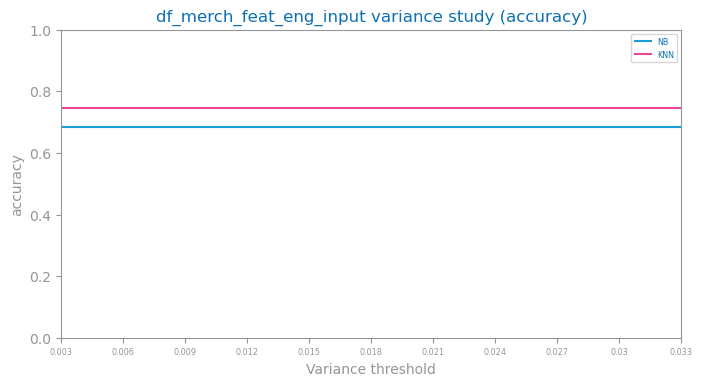

In [14]:
if evaluate==True:

    eval_metric = "accuracy"
    figure(figsize=(2 * HEIGHT, HEIGHT))
    study_variance_for_feature_selection(
        train_sample,
        test_sample,
        target=target,
        max_threshold=0.033,
        lag=0.003,
        metric=eval_metric,
        file_tag=file_tag,
        min_features_to_keep = 10  # Minimum features safeguard

    )
    show()

## Feat 1 strategy Application

In [15]:
from pandas import DataFrame, Index

def apply_strategy_1(df: DataFrame) -> DataFrame:

    # this script is available in data_functions originally from DSLabs site in Feature Selection chapter

    df_copy=df.copy()
    
    vars2drop: list[str] = select_low_variance_variables(df_copy, max_threshold=0.024, min_features_to_keep=10, target=target)
    
    print("columns to drop:", vars2drop)

    df_vars_drop = df_copy.drop(columns=vars2drop, errors='ignore')
    
    print("Remaining columns:", df_vars_drop.columns)

    return df_vars_drop


data_1=apply_strategy_1(data)

data_1.describe()


Variance threshold: 0.024, Remaining features: 42
Variables to drop: []
columns to drop: []
Remaining columns: Index(['event_name', 'device_category', 'device_mobile_brand_name',
       'device_mobile_model_name', 'device_operating_system',
       'device_operating_system_version', 'device_language',
       'device_web_info_browser', 'device_web_info_browser_version',
       'geo_region', 'geo_city', 'traffic_source_medium',
       'traffic_source_source', 'engagement_time_msec', 'month', 'day_of_year',
       'week_number', 'page_path_level_1', 'page_path_level_2',
       'page_path_level_3', 'path_length', 'time_of_day_sin',
       'time_of_day_cos', 'local_hour_sin', 'local_hour_cos',
       'local_minute_sin', 'local_minute_cos', 'hour_minute_fraction_sin',
       'hour_minute_fraction_cos', 'day_sin', 'day_cos', 'day_of_week_nr_sin',
       'day_of_week_nr_cos', 'week_of_month_nr_sin', 'week_of_month_nr_cos',
       'geo_country', 'session_engaged', 'year', 'quarter', 'is_weekend'

,event_name,device_category,device_mobile_brand_name,device_mobile_model_name,device_operating_system,device_operating_system_version,device_language,device_web_info_browser,device_web_info_browser_version,geo_region,...,day_of_week_nr_cos,week_of_month_nr_sin,week_of_month_nr_cos,geo_country,session_engaged,year,quarter,is_weekend,domain,returning_user
count,3.644270e+05,3.644270e+05,3.644270e+05,3.644270e+05,3.644270e+05,3.644270e+05,3.644270e+05,3.644270e+05,3.644270e+05,3.644270e+05,...,3.644270e+05,3.644270e+05,3.644270e+05,3.644270e+05,3.644270e+05,3.644270e+05,3.644270e+05,3.644270e+05,3.644270e+05,364427.000000
mean,4.258261e-17,-3.759124e-17,3.106347e-16,-3.210074e-16,1.132807e-16,3.395690e-16,-4.354189e-16,2.350623e-16,-3.199155e-16,2.041782e-16,...,1.060666e-16,1.260321e-16,8.485326e-17,2.804525e-16,-1.637793e-17,-6.863132e-16,-6.863132e-16,-7.237484e-17,-1.881122e-16,0.258603
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.437868
min,-3.112793e+00,-8.375008e-01,-3.554343e+00,-3.465924e+00,-2.338537e+00,-1.879641e+00,-4.399120e+00,-3.428295e+00,-2.442223e+00,-1.696409e+00,...,-1.457667e+00,-1.128193e+00,-1.160285e+00,-4.131487e-01,-3.258325e+00,-5.968412e-01,-5.968412e-01,-4.967290e-01,-5.248707e+00,0.000000
25%,-4.302245e-01,-8.375008e-01,-5.725151e-01,-8.045217e-01,-1.078404e+00,-1.054978e+00,-4.579492e-04,-3.009464e-01,-7.591802e-01,-7.998015e-01,...,-7.863611e-01,-1.128193e+00,-3.394597e-01,-4.131487e-01,3.069061e-01,-5.968412e-01,-5.968412e-01,-4.967290e-01,1.905231e-01,0.000000
50%,6.428031e-01,-8.375008e-01,1.729418e-01,-1.391712e-01,1.817289e-01,1.233586e-04,-4.579492e-04,-3.009464e-01,-1.981660e-01,3.584113e-01,...,5.562513e-01,4.847419e-02,-3.394597e-01,-4.131487e-01,3.069061e-01,-5.968412e-01,-5.968412e-01,-4.967290e-01,1.905231e-01,0.000000
75%,6.428031e-01,1.221126e+00,1.729418e-01,5.261793e-01,8.117952e-01,1.820165e-01,7.760339e-01,1.262728e+00,5.321872e-04,7.902583e-01,...,1.227557e+00,1.225141e+00,1.302192e+00,-4.131487e-01,3.069061e-01,1.675488e+00,1.675488e+00,-4.967290e-01,1.905231e-01,1.000000
max,3.325372e+00,1.221126e+00,3.154769e+00,2.854906e+00,1.441862e+00,2.243674e+00,7.760339e-01,2.826402e+00,3.728933e+00,1.987059e+00,...,1.227557e+00,1.225141e+00,2.123017e+00,2.420436e+00,3.069061e-01,1.675488e+00,1.675488e+00,2.013170e+00,1.905231e-01,1.000000


## Feat 1 train/test split 

Labels=[0.0, 1.0]


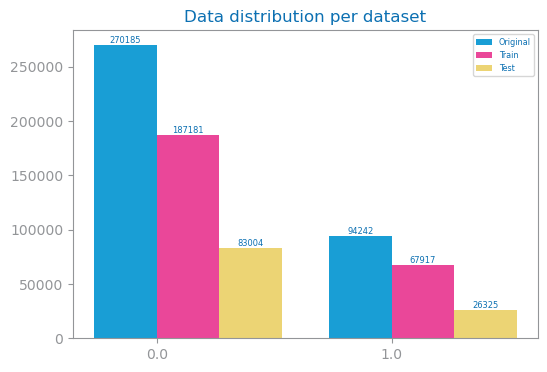

In [16]:
if evaluate==True:

    from pandas import concat
    from matplotlib.pyplot import figure, show
    from sklearn.model_selection import train_test_split
    from dslabs_functions import plot_multibar_chart


    # Call the function to split the data
    from numpy import array, ndarray


    y_1, X_1, labels, values = define_target_and_prepare_data(data_1, target)



    train_1, test_1 = split_data_save_csv(pd.DataFrame(X_1, columns=data_1.columns), y_1, data_columns=data_1.columns, target_column=target)

    # Distribution check
    values["Train"] = [
        len(train_1[train_1[target] == 0]),
        len(train_1[train_1[target] == 1]),
    ]
    values["Test"] = [
        len(test_1[test_1[target] == 0]),
        len(test_1[test_1[target] == 1]),
    ]

    # Visualize the distribution
    figure(figsize=(6, 4))
    plot_multibar_chart(labels, values, title="Data distribution per dataset")
    show()

## Feat 1 evaluate

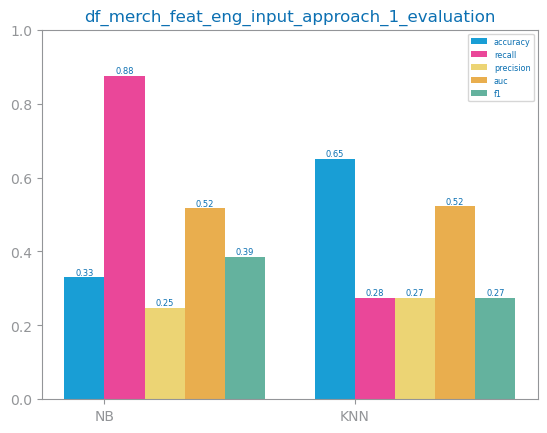

In [17]:
if evaluate==True:

    # evaluate_approach is in data_functions originally from DSLABS/ Data Prep / Methodology
    # removed Multinomial from run_NB function because dataset has negative values

    figure()
    eval_1: dict[str, list] = evaluate_approach(train_1, test_1, target='returning_user', metric="recall")
    plot_multibar_chart(
        ["NB", "KNN"], eval_1, title=f"{file_tag}_approach_1_evaluation", percentage=True
    )
    savefig(f"images/{file_tag}_approach_1_evaluation.png")
    show()

# Feat 2 - Dropping Redundant Variables


## Feat 2 - Study redundant variables and threshold

In [18]:
test.columns

Index(['event_name', 'device_category', 'device_mobile_brand_name',
       'device_mobile_model_name', 'device_operating_system',
       'device_operating_system_version', 'device_language',
       'device_web_info_browser', 'device_web_info_browser_version',
       'geo_region', 'geo_city', 'traffic_source_medium',
       'traffic_source_source', 'engagement_time_msec', 'month', 'day_of_year',
       'week_number', 'page_path_level_1', 'page_path_level_2',
       'page_path_level_3', 'path_length', 'time_of_day_sin',
       'time_of_day_cos', 'local_hour_sin', 'local_hour_cos',
       'local_minute_sin', 'local_minute_cos', 'hour_minute_fraction_sin',
       'hour_minute_fraction_cos', 'day_sin', 'day_cos', 'day_of_week_nr_sin',
       'day_of_week_nr_cos', 'week_of_month_nr_sin', 'week_of_month_nr_cos',
       'geo_country', 'session_engaged', 'year', 'quarter', 'is_weekend',
       'domain', 'returning_user'],
      dtype='object')

### precision

In [ ]:
if evaluate==True:

    # modified study_variance_for_feature_selection() in dslabs functions to keep minimum variables and print metrics (due to error)


    eval_metric = "precision"
    figure(figsize=(2 * HEIGHT, HEIGHT))
    study_redundancy_for_feature_selection(
        train_sample,
        test_sample,
        target=target,
        min_threshold = 0.001,
        lag = 0.2,
        metric=eval_metric,
        file_tag=file_tag,
    )
    show()

### recall

Columns in the train dataset: ['event_name', 'device_category', 'device_mobile_brand_name', 'device_mobile_model_name', 'device_operating_system', 'device_operating_system_version', 'device_language', 'device_web_info_browser', 'device_web_info_browser_version', 'geo_region', 'geo_city', 'traffic_source_medium', 'traffic_source_source', 'engagement_time_msec', 'month', 'day_of_year', 'week_number', 'page_path_level_1', 'page_path_level_2', 'page_path_level_3', 'path_length', 'time_of_day_sin', 'time_of_day_cos', 'local_hour_sin', 'local_hour_cos', 'local_minute_sin', 'local_minute_cos', 'hour_minute_fraction_sin', 'hour_minute_fraction_cos', 'day_sin', 'day_cos', 'day_of_week_nr_sin', 'day_of_week_nr_cos', 'week_of_month_nr_sin', 'week_of_month_nr_cos', 'geo_country', 'session_engaged', 'year', 'quarter', 'is_weekend', 'domain']
Variables considered for correlation: ['event_name', 'device_category', 'device_mobile_brand_name', 'device_mobile_model_name', 'device_operating_system', 'dev

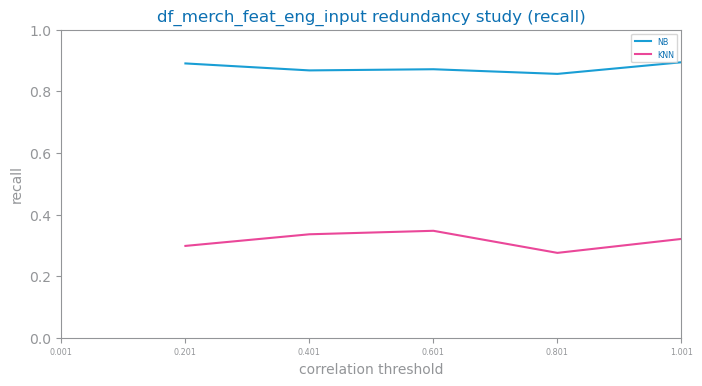

In [19]:
if evaluate==True:

    # modified study_variance_for_feature_selection() in dslabs functions to keep minimum variables and print metrics (due to error)


    eval_metric = "recall"
    figure(figsize=(2 * HEIGHT, HEIGHT))
    study_redundancy_for_feature_selection(
        train_sample,
        test_sample,
        target=target,
        min_threshold = 0.001,
        lag = 0.2,
        metric=eval_metric,
        file_tag=file_tag,
    )
    show()

### accuracy

Columns in the train dataset: ['event_name', 'device_category', 'device_mobile_brand_name', 'device_mobile_model_name', 'device_operating_system', 'device_operating_system_version', 'device_language', 'device_web_info_browser', 'device_web_info_browser_version', 'geo_region', 'geo_city', 'traffic_source_medium', 'traffic_source_source', 'engagement_time_msec', 'month', 'day_of_year', 'week_number', 'page_path_level_1', 'page_path_level_2', 'page_path_level_3', 'path_length', 'time_of_day_sin', 'time_of_day_cos', 'local_hour_sin', 'local_hour_cos', 'local_minute_sin', 'local_minute_cos', 'hour_minute_fraction_sin', 'hour_minute_fraction_cos', 'day_sin', 'day_cos', 'day_of_week_nr_sin', 'day_of_week_nr_cos', 'week_of_month_nr_sin', 'week_of_month_nr_cos', 'geo_country', 'session_engaged', 'year', 'quarter', 'is_weekend', 'domain']
Variables considered for correlation: ['event_name', 'device_category', 'device_mobile_brand_name', 'device_mobile_model_name', 'device_operating_system', 'dev

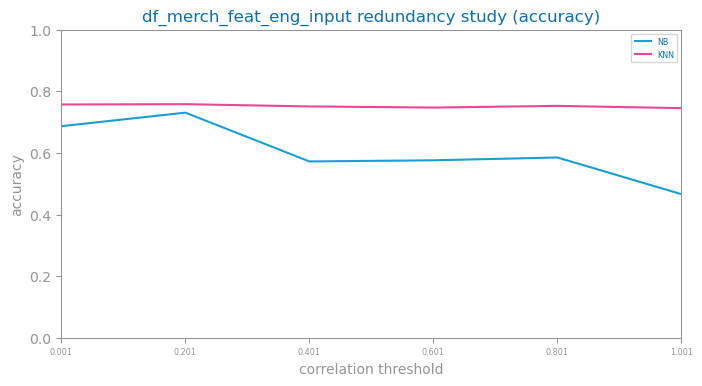

In [20]:
if evaluate==True:

    # modified study_variance_for_feature_selection() in dslabs functions to keep minimum variables and print metrics (due to error)


    eval_metric = "accuracy"
    figure(figsize=(2 * HEIGHT, HEIGHT))
    study_redundancy_for_feature_selection(
        train_sample,
        test_sample,
        target=target,
        min_threshold = 0.001,
        lag = 0.2,
        metric=eval_metric,
        file_tag=file_tag,
    )
    show()

## Feat 2 strategy aplication

In [21]:
from pandas import DataFrame, Series
from sklearn.preprocessing import MinMaxScaler

def apply_strategy_2(df):

    df_copy=df.copy()

    vars2drop = select_redundant_variables(df_copy, min_threshold=0.4, target=target)
    print("columns to drop:", vars2drop)

    df_vars_drop = df_copy.drop(columns=vars2drop, errors='ignore')
    
    print("Remaining columns:", df_vars_drop.columns)


    return df_vars_drop


data_2=data.copy()

data_2=apply_strategy_2(data_2)


columns to drop: ['device_mobile_brand_name', 'device_mobile_model_name', 'device_operating_system', 'device_operating_system_version', 'device_category', 'day_of_year', 'week_number', 'year', 'quarter', 'month', 'page_path_level_2', 'page_path_level_3', 'path_length', 'page_path_level_1', 'local_hour_sin', 'local_hour_cos', 'hour_minute_fraction_sin', 'hour_minute_fraction_cos', 'time_of_day_sin', 'time_of_day_cos']
Remaining columns: Index(['event_name', 'device_language', 'device_web_info_browser',
       'device_web_info_browser_version', 'geo_region', 'geo_city',
       'traffic_source_medium', 'traffic_source_source',
       'engagement_time_msec', 'local_minute_sin', 'local_minute_cos',
       'day_sin', 'day_cos', 'day_of_week_nr_sin', 'day_of_week_nr_cos',
       'week_of_month_nr_sin', 'week_of_month_nr_cos', 'geo_country',
       'session_engaged', 'is_weekend', 'domain', 'returning_user'],
      dtype='object')


## Feat 2 train/test split 

Labels=[0.0, 1.0]


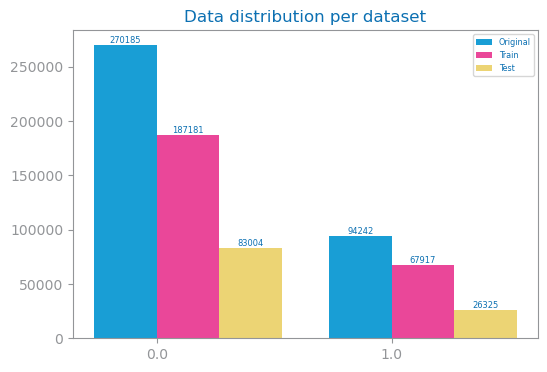

In [22]:
if evaluate ==True:
    from pandas import concat
    from matplotlib.pyplot import figure, show
    from sklearn.model_selection import train_test_split
    from dslabs_functions import plot_multibar_chart

    # train/test split from DSLABS Classification/Evaluation Chapter
    # created split_data_save_csv on data_functions

    # Call the function to split the data

    y_2, X_2, labels, class_counts = define_target_and_prepare_data(data_2, target=target)


    train_2, test_2 = split_data_save_csv(pd.DataFrame(X_2, columns=data_2.columns), y_2, data_columns=data_2.columns, target_column=target)


    values["Train"] = [
        len(train_2[train_2[target] == 0]),
        len(train_2[train_2[target] == 1]),
    ]
    values["Test"] = [
        len(test_2[test_2[target] == 0]),
        len(test_2[test_2[target] == 1]),
    ]

    figure(figsize=(6, 4))
    plot_multibar_chart(labels, values, title="Data distribution per dataset")

## Feat 2 evaluate

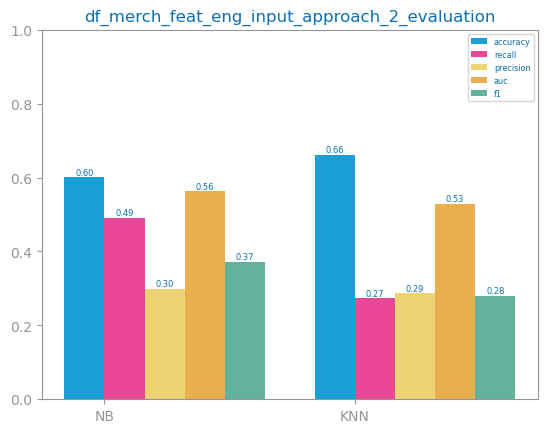

In [23]:
if evaluate == True:
    figure()
    eval_2: dict[str, list] = evaluate_approach(train_2, test_2, target='returning_user', metric="recall")
    plot_multibar_chart(
        ["NB", "KNN"], eval_2, title=f"{file_tag}_approach_2_evaluation", percentage=True
    )
    savefig(f"images/{file_tag}_approach_2_evaluation.png")
    show()

# Approach uplift comparison

## uplift df

In [24]:
if evaluate == True:
    
    algorithms = ['Naive Bayes', 'KNN']

    # Create DataFrames for eval_1 and eval_2
    df_eval_1 = pd.DataFrame(eval_1, index=algorithms)
    df_eval_2 = pd.DataFrame(eval_2, index=algorithms)

    # Calculate uplift
    df_uplift = df_eval_2 - df_eval_1



    # Combine everything into one DataFrame (without misalignment issues)
    comparison_df = pd.concat([df_eval_1, df_eval_2, df_uplift], axis=1)
    comparison_df.columns = pd.MultiIndex.from_product([['Approach 1', 'Approach 2', 'Uplift'], eval_1.keys()])



    # Display the DataFrame
    display(comparison_df)

Approach 1                                         Approach 2  \
              accuracy    recall precision       auc        f1   accuracy   
Naive Bayes   0.329784  0.875708  0.247735  0.516175  0.386212   0.601057   
KNN           0.650651  0.275138  0.274825  0.522442  0.274981   0.661846   

                                                       Uplift            \
               recall precision       auc        f1  accuracy    recall   
Naive Bayes  0.491244  0.299664  0.563565  0.372251  0.271273 -0.384463   
KNN          0.274112  0.287754  0.529465  0.280767  0.011196 -0.001026   

                                           
            precision       auc        f1  
Naive Bayes  0.051929  0.047389 -0.013961  
KNN          0.012929  0.007023  0.005786

# Analysis

- No improvement (actuall loss)


# save to csv

In [27]:
if test_data==False:
    
    
    data_save=data.copy()

    # data_save=apply_strategy_1(data_save)
        
    data_save.to_csv(f"data/df_merch_6_feat_eng_input.csv", index=False)


    print(data_save.columns)



Index(['event_name', 'device_category', 'device_mobile_brand_name',
       'device_mobile_model_name', 'device_operating_system',
       'device_operating_system_version', 'device_language',
       'device_web_info_browser', 'device_web_info_browser_version',
       'geo_region', 'geo_city', 'traffic_source_medium',
       'traffic_source_source', 'engagement_time_msec', 'month', 'day_of_year',
       'week_number', 'page_path_level_1', 'page_path_level_2',
       'page_path_level_3', 'path_length', 'time_of_day_sin',
       'time_of_day_cos', 'local_hour_sin', 'local_hour_cos',
       'local_minute_sin', 'local_minute_cos', 'hour_minute_fraction_sin',
       'hour_minute_fraction_cos', 'day_sin', 'day_cos', 'day_of_week_nr_sin',
       'day_of_week_nr_cos', 'week_of_month_nr_sin', 'week_of_month_nr_cos',
       'geo_country', 'session_engaged', 'year', 'quarter', 'is_weekend',
       'domain', 'returning_user'],
      dtype='object')


## train test csv

In [28]:
if test_data==False:
    

    # data_save_copy=data_save.copy() 
    # y, X, labels, class_counts = define_target_and_prepare_data(data_save_copy, target=target)
    # train, test = split_data_save_csv(pd.DataFrame(X, columns=data_save_copy.columns), y, data_columns=data_save_copy.columns, target_column=target)  

    
    train,test=simple_split_df(data_save,sort_by='day_of_year')
    
    train.to_csv(f"data/df_merch_6_feat_eng_input_train.csv", index=False)
    print(train.columns)
    
    test.to_csv(f"data/df_merch_6_feat_eng_input_test.csv", index=False)
    print(test.columns)

Index(['event_name', 'device_category', 'device_mobile_brand_name',
       'device_mobile_model_name', 'device_operating_system',
       'device_operating_system_version', 'device_language',
       'device_web_info_browser', 'device_web_info_browser_version',
       'geo_region', 'geo_city', 'traffic_source_medium',
       'traffic_source_source', 'engagement_time_msec', 'month', 'day_of_year',
       'week_number', 'page_path_level_1', 'page_path_level_2',
       'page_path_level_3', 'path_length', 'time_of_day_sin',
       'time_of_day_cos', 'local_hour_sin', 'local_hour_cos',
       'local_minute_sin', 'local_minute_cos', 'hour_minute_fraction_sin',
       'hour_minute_fraction_cos', 'day_sin', 'day_cos', 'day_of_week_nr_sin',
       'day_of_week_nr_cos', 'week_of_month_nr_sin', 'week_of_month_nr_cos',
       'geo_country', 'session_engaged', 'year', 'quarter', 'is_weekend',
       'domain', 'returning_user'],
      dtype='object')
Index(['event_name', 'device_category', 'device_mob